In [2]:
import os
import pandas as pd
import numpy as np
import preprocessing as proc
import randomforest as rf
from pandas.api.types import CategoricalDtype
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import joblib

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix


%matplotlib inline

plt.style.use('seaborn-ticks')
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

pd.options.display.max_columns = 1000

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


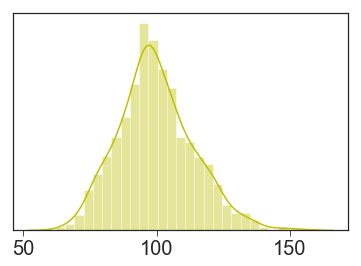

In [3]:
from sklearn.preprocessing import StandardScaler

# x = np.random.exponential(3, 1000) + 50
# x = np.random.lognormal(5, 0.5, 1000)
x = np.random.chisquare(100, 1000)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.reshape(-1, 1))

sns.distplot(x, color='y')
plt.yticks([])
plt.savefig('../results/for thesis1.png', bbox_inches='tight', dpi=300);

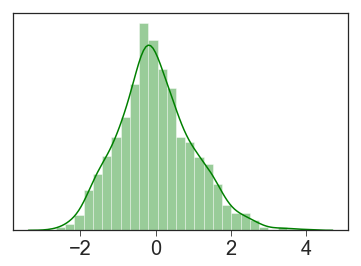

In [4]:
sns.distplot(x_scaled, color='g')
plt.yticks([]);
plt.savefig('../results/for thesis2.png', bbox_inches='tight', dpi=300);

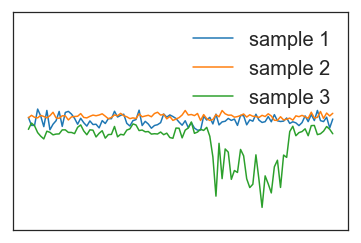

In [28]:
x1 = np.random.normal(0, 0.5, 100)
x2 = np.random.normal(0.5, 0.2, 100)
x3 = np.random.normal(-1, 0.5, 100)
x3[60:85] = x3[60:85] * 4.5

plt.plot(x1, label='sample 1');
plt.plot(x2, label='sample 2');
plt.plot(x3, label='sample 3');
plt.legend(fontsize=20, loc='upper right');
plt.ylim([-11, 11])
plt.xticks([])
plt.yticks([])
plt.savefig('../results/for thesis3.png', bbox_inches='tight', dpi=300);

In [125]:
x3[60:85] = x3[60:85] * 5

In [49]:
print(x.mean(), x.std())
print(x_scaled.mean(), x_scaled.std())

4.673668648479134 4.63027519679842
5.1514348342607266e-17 1.0


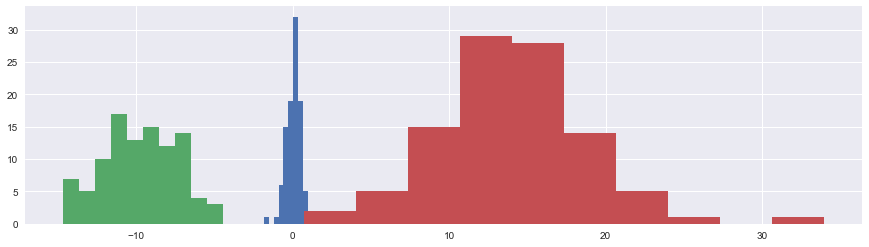

In [31]:
x1 = 0.5 * np.random.randn(100)
x2 = 2.5 * np.random.randn(100) - 10
x3 = 5 * np.random.randn(100) + 15


plt.hist(x1);
plt.hist(x2);
plt.hist(x3);

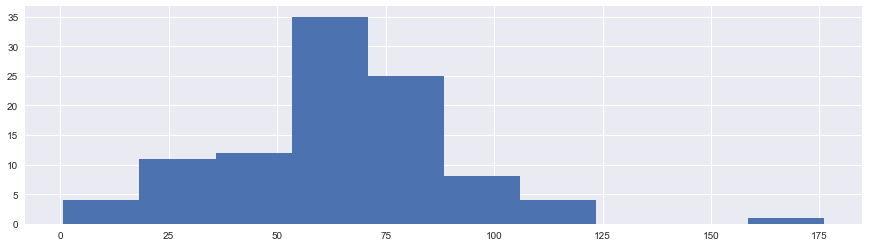

In [32]:
y = 2 * x1 + 0.5 * x2 + 5 * x3 + (10 * np.random.randn(100))
y = y.reshape(100, 1)
plt.hist(y);

In [33]:
X = np.array([x1, x2, x3]).T
X.shape

(100, 3)

In [34]:
# Predict y using the full set of features
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
y_hat = lin_reg.predict(X)

[-5.05793358] [[5.0077248  0.25917618 5.08006814]]


In [35]:
X_i = np.array([x1, x2]).T
X_i.shape

(100, 2)

In [36]:
# Residual from predicting x3 on x1, x2 is the additional 
# information not already present in the selected features
lin_reg.fit(X_i, x3)
print(lin_reg.intercept_, lin_reg.coef_)
u = x3 - lin_reg.predict(X_i)

16.37588269778778 [-1.00503835  0.23357978]


In [37]:
# Predict y using only features x1, x2
lin_reg.fit(X_i, y)
print(lin_reg.intercept_, lin_reg.coef_)
y_i_hat = lin_reg.predict(X_i)

[78.1326663] [[-0.09793853  1.44577737]]


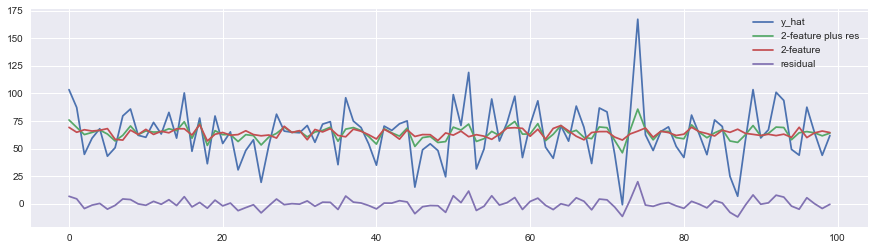

In [38]:
plt.plot(y_hat, label='y_hat');
plt.plot(y_i_hat.reshape(-1) + u, label='2-feature plus res');
plt.plot(y_i_hat.reshape(-1), label='2-feature')
plt.plot(u, label='residual');
plt.legend();

In [42]:
df = pd.DataFrame({'a': [1,2,3], 'b': [2,3,4], 'c':[5,9,1]})
df

,a,b,c
0,1,2,5
1,2,3,9
2,3,4,1


In [44]:
df.sum(axis=1)

0     8
1    14
2     8
dtype: int64